# <center><font color='black'>**Projet De Twitter**</font></center>
#### <font color='gray'>Réaliser par Mohamed amine Sekmani 3DNI2</font>
# 

**1.** Télécharger  les Tweets à partir de Twitter en utilisant l’API de twitter

In [ ]:
!pip install tweepy

**Charger la bibliothèque de twitter pour télécharger les tweets**

In [3]:
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener#twitter
import DateTime#temp
import timeit#time
import sys#system
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag, ne_chunk#NLTK
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt#stats
import csv#file.csv
import re#clean 
from wordcloud import WordCloud
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer#traitement
import json
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import en_core_web_sm
from nltk.tokenize import RegexpTokenizer, WhitespaceTokenizer
import string
from string import punctuation
import spacy

**charger les bibliothèque nécissaires**

In [217]:
apikey = '0Gz01a6oCZ9YrGea7vF3uCIc3'
apisecret = 'yqAyQ4E5mzdgbBVCSpZ0B7JQmXglp2MVvnUzdbliUYe3iHixAu'
token = '1331646107714285569-Ow1g5ybOKFO8PT0Kih3VNNeLB3TpSe'
tokensecret = 'IMMtwt9jCGkqo4hJx8fYi1hWigEuiS6f0egWQgIQ9LTpu'


i=0
x=0
start = timeit.default_timer()

class listener(StreamListener):

    def on_data(self, data):
        unwanted_characters = [",","@","[","]","&","\n","~","{","}","#","|","§",'_']
        FileNames=["Politic_Tweet.csv","Sport_Tweet.csv","Music_Tweet.csv","Education_Tweet.csv","Science_Tweet.csv","Technologie_Tweet.csv"]
        try:
            global i
            global x
            global start
            i=i+1
            TheTime=data.split('{"created_at":"')[1].split('","id')[0]
            tweet=data.split(',"text":"')[1].split('","source')[0]
            for unwanted in unwanted_characters:
                tweet = tweet.replace(unwanted, '')
                
            name=FileNames[x] 
            saveThis=open(name,"a")
            dataSplitted=str("tweet ")+str(i)+str(":")+str("Time:")+TheTime+str(" ,tweet text:")+tweet
            saveThis.write(dataSplitted)
            saveThis.write("\n")
            saveThis.close()
            stop = timeit.default_timer()
            if (stop - start)>30:
                print("time finish")
                sys.exit()
            return True
        except Exception as e:
            print('failed ',str(e))
            time.sleep(0.5)
            
    def on_error(self, status):
        print (status)
        

auth = OAuthHandler(apikey, apisecret)
auth.set_access_token(token, tokensecret)

Track=["Politic","Sport","Music","Education","Science","Technologie"]

for i in range(6):   
    twitterStream= Stream(auth, listener())
    twitterStream.filter(track=[Track[i]])
    time.sleep(0.5)
    x+=1
    print(x)
        

KeyboardInterrupt: 

**Charger à chaque fois des tweets est les charger automatiquement dans des fichiers, le thème des tweets ce change automatiquement chaque 5 minutes successivement avec le nom de fichier**

In [4]:
Comlumns = ['Date', 'tweet']

tweety = pd.read_csv("Politic_Tweet.csv", header=None, names=Comlumns)
tweety.head(10)

,Date,tweet
0,tweet 1:Time:Tue Dec 15 13:41:57 +0000 2020,tweet text:WHEN THEY SAY PEACE AND..\nJoe Bide...
1,tweet 2:Time:Tue Dec 15 13:42:27 +0000 2020,tweet text:RT elespanolcom: S\u00e1nchez acept...
2,tweet 3:Time:Tue Dec 15 13:42:44 +0000 2020,tweet text:Iba a decir 'para que luego digan q...
3,tweet 4:Time:Tue Dec 15 13:43:13 +0000 2020,tweet text:\u0427\u0442\u043e \u043f\u0440\u04...
4,tweet 5:Time:Tue Dec 15 13:43:25 +0000 2020,tweet text:RT YouGov: Confidence in the Welsh ...
5,tweet 6:Time:Tue Dec 15 13:43:26 +0000 2020,tweet text:RT YouGov: Confidence in the Welsh ...
6,tweet 7:Time:Tue Dec 15 13:43:26 +0000 2020,tweet text:See what George Conway thinks about...
7,tweet 8:Time:Tue Dec 15 13:43:31 +0000 2020,tweet text:RT elespanolcom: Lanzan monedas a l...
8,tweet 9:Time:Tue Dec 15 13:43:40 +0000 2020,tweet text:RT YouGov: Confidence in the Welsh ...
9,tweet 10:Time:Tue Dec 15 13:43:47 +0000 2020,tweet text:RT tommyinboots: when you see me sa...


**Lire le fichier .csv est mettre les données dans deux colonnes, la séparation ce fait par un virgule**

In [5]:
tweety.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    54 non-null     object
 1   tweet   54 non-null     object
dtypes: object(2)
memory usage: 992.0+ bytes


**Afficher les infos des tweets**

In [6]:
tweety.shape

(54, 2)

In [7]:
tweety.to_csv('cleaned_Politic.csv',index = False)
tweety.head(10)

,Date,tweet
0,tweet 1:Time:Tue Dec 15 13:41:57 +0000 2020,tweet text:WHEN THEY SAY PEACE AND..\nJoe Bide...
1,tweet 2:Time:Tue Dec 15 13:42:27 +0000 2020,tweet text:RT elespanolcom: S\u00e1nchez acept...
2,tweet 3:Time:Tue Dec 15 13:42:44 +0000 2020,tweet text:Iba a decir 'para que luego digan q...
3,tweet 4:Time:Tue Dec 15 13:43:13 +0000 2020,tweet text:\u0427\u0442\u043e \u043f\u0440\u04...
4,tweet 5:Time:Tue Dec 15 13:43:25 +0000 2020,tweet text:RT YouGov: Confidence in the Welsh ...
5,tweet 6:Time:Tue Dec 15 13:43:26 +0000 2020,tweet text:RT YouGov: Confidence in the Welsh ...
6,tweet 7:Time:Tue Dec 15 13:43:26 +0000 2020,tweet text:See what George Conway thinks about...
7,tweet 8:Time:Tue Dec 15 13:43:31 +0000 2020,tweet text:RT elespanolcom: Lanzan monedas a l...
8,tweet 9:Time:Tue Dec 15 13:43:40 +0000 2020,tweet text:RT YouGov: Confidence in the Welsh ...
9,tweet 10:Time:Tue Dec 15 13:43:47 +0000 2020,tweet text:RT tommyinboots: when you see me sa...


**Crier un fichier pour metter les tweets nettoyer**

In [158]:
for i, Column in tweety.iterrows():
    Rows = Column['tweet']
    Rows1 = Rows.replace("http:\/\/", "")
    Rows2 = Rows1.replace("RT", "")
    Rows3 = Rows2.replace("FFFFFF", "")
    Rows1 = Rows.replace("https:\/\/", "")
    Rows1 = Rows.replace("URL:", "")
    Rows1 = Rows.replace("\\", "")
    Rows1 = Rows.replace("", "")

    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u00e0"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    
    Rows4 =re.sub(emoji_pattern, "", Rows3)
    
    tweety.loc[i,'tweet'] =Rows4

Le nettoyage ce fait de cette façon:
**Chaque caractères n'est pas attendu ce remplacer par un vide**

#### emoji_pattern reference:
"https://www.kaggle.com/galvaowesley/basic-nlp-eda-tensorflow-real-or-fake-tweets"

In [159]:
tweety.to_csv('cleaned_Politic.csv',index = False)
tweety.head(10)

,Date,tweet
0,tweet 1:Time:Tue Dec 15 13:41:57 +0000 2020,tweet text:WHEN THEY SAY PEACE AND..\nJoe Bide...
1,tweet 2:Time:Tue Dec 15 13:42:27 +0000 2020,tweet text: elespanolcom: S\u00e1nchez acepta ...
2,tweet 3:Time:Tue Dec 15 13:42:44 +0000 2020,tweet text:Iba a decir 'para que luego digan q...
3,tweet 4:Time:Tue Dec 15 13:43:13 +0000 2020,tweet text:\u0427\u0442\u043e \u043f\u0440\u04...
4,tweet 5:Time:Tue Dec 15 13:43:25 +0000 2020,tweet text: YouGov: Confidence in the Welsh go...
5,tweet 6:Time:Tue Dec 15 13:43:26 +0000 2020,tweet text: YouGov: Confidence in the Welsh go...
6,tweet 7:Time:Tue Dec 15 13:43:26 +0000 2020,tweet text:See what George Conway thinks about...
7,tweet 8:Time:Tue Dec 15 13:43:31 +0000 2020,tweet text: elespanolcom: Lanzan monedas a los...
8,tweet 9:Time:Tue Dec 15 13:43:40 +0000 2020,tweet text: YouGov: Confidence in the Welsh go...
9,tweet 10:Time:Tue Dec 15 13:43:47 +0000 2020,tweet text: tommyinboots: when you see me say ...


**2.** Utiliser  la  bibliothèque  NLTK  pour  effectuer  une  analyse  de  chaque  tweet  et  le  transformer  en  un ensemble   de   mots

In [11]:
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/mohamedamine/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [160]:

text1='''I'm happy, I win, I'm a hero I succeed in my education, I'm a good man'''
text2='''I'm so sad I'm so tired I'm so angry I cry all the night I can't stop thinking I'm a looser'''

#analysis = TextBlob(text).sentiment
blob_object = TextBlob(text1, analyzer=NaiveBayesAnalyzer())
all_analysis = blob_object.sentiment
analysis = blob_object.sentiment[2]
print("this is all sentiment:",all_analysis,"and this negative sentiment:",analysis)

this is all sentiment: Sentiment(classification='pos', p_pos=0.7762777004514765, p_neg=0.22372229954852302) and this negative sentiment: 0.22372229954852302


**On a fait un test de sentiment avec l'analyser naivebayes, on choisie deux texte, l'un est plein des sentiments positive est l'autre a des sentiments négatives**

In [8]:
setting_data = open('cleaned_Politic.csv', 'r')
lines = setting_data.readlines()
tweetyText = ''
for i in lines:
    tweetyText = tweetyText + i

**Le raison de charger les tweets on un variable, car les technologies word est tokenize de NLTK ne fonctionne pas avec fichier de type .csv**

In [162]:
pos = 0
neg = 0
neu = 0
for tw in tweety.tweet:
    #blob_object = TextBlob(tw,analyzer=NaiveBayesAnalyzer())
    analysis = TextBlob(tw)
    anal = analysis.sentiment[1]
    if anal > 0.5:
        pos +=1
    elif anal < 0.5:
        neg +=1
    else:
        neu +=1
        
print("Total Positive = ", pos)
print("Total Negative = ", neg)
print("Total Neutral = ", neu)

Total Positive =  7
Total Negative =  33
Total Neutral =  7


**On a compter les sentiments positives ainsi les sentiments négatives des tweets**

In [163]:
blob_object = TextBlob(tweetyText, analyzer=NaiveBayesAnalyzer())
all_analysis = blob_object.sentiment
analysis = blob_object.sentiment[2]
print("this is all sentiments:",all_analysis,"and this is the negative sentiments:",analysis)

this is all sentiments: Sentiment(classification='pos', p_pos=1.0, p_neg=1.1782788047474758e-19) and this is the negative sentiments: 1.1782788047474758e-19


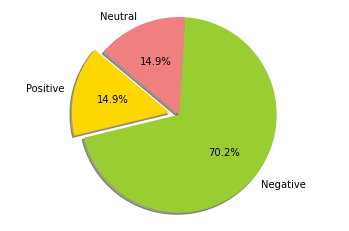

In [164]:
#Plotting sentiments
labels = 'Positive', 'Negative', 'Neutral'
sizes = [pos, neg, neu]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [33]:

def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens.split():
            yield token

all_words = get_all_words(tweety.tweet)
print(all_words)

<generator object get_all_words at 0x7fb79c5f1f50>


**Prend tous les mots**

In [34]:
freq_dist_pos = FreqDist(all_words)
print(freq_dist_pos.most_common(30))

[('tweet', 55), ('the', 29), ('text:RT', 28), ('a', 20), ('in', 18), ('to', 15), ('of', 15), ('-', 10), ('de', 10), ('has', 10), ('and', 10), ('this', 8), ('leaving', 8), ('Welsh', 7), ('we', 7), ('Mitchell', 7), ('says', 7), ("he's", 7), ('GOP:', 7), ("I've", 7), ('had', 7), ('enough', 7), ('CNN', 7), ('Video', 7), ('https:\\/\\/t.co\\/wcU7layylL', 7), ('YouGov:', 6), ('+0000', 6), ('that', 6), ('from', 6), ('jaketapper:', 6)]


**Afficher la répition de premier 30 mots dans les tweets**

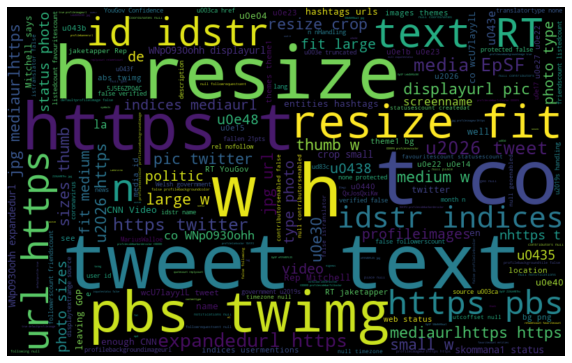

In [29]:

#Word Cloud
all_words = ' '.join([text for text in tweety.tweet])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [168]:

sents=sent_tokenize(tweetyText)
print(sents)

['Date,tweet\ntweet 1:Time:Tue Dec 15 13:41:57 +0000 2020 ,tweet text:WHEN THEY SAY PEACE AND..\\nJoe Biden Wants to Return Americans to the Obama Glory Days - NewsBlaze News https:\\/\\/t.co\\/TkilKuev02\ntweet 2:Time:Tue Dec 15 13:42:27 +0000 2020 ,tweet text: elespanolcom: S\\u00e1nchez acepta el pacto de Estado sobre inmigraci\\u00f3n de Casado pero con una nueva Ley de Extranjer\\u00eda por ADPrietoPYC \\nht\\u2026\ntweet 3:Time:Tue Dec 15 13:42:44 +0000 2020 ,tweet text:Iba a decir \'para que luego digan que los catalanes son taca\\u00f1os\' pero eran de chocolate.\\n\\nAnother day in the democ\\u2026 https:\\/\\/t.co\\/m3gGTYNhHt\ntweet 4:Time:Tue Dec 15 13:43:13 +0000 2020 ,tweet text:\\u0427\\u0442\\u043e \\u043f\\u0440\\u043e\\u0438\\u0437\\u043e\\u0439\\u0434\\u0435\\u0442 \\u0432 \\u0411\\u0435\\u043b\\u0430\\u0440\\u0443\\u0441\\u0438 \\u043f\\u043e\\u0441\\u043b\\u0435 \\u0432\\u0441\\u0442\\u0443\\u043f\\u043b\\u0435\\u043d\\u0438\\u044f \\u0432 \\u0415\\u0421  \\u041f\\

In [169]:
print(nltk.pos_tag(word_tokenize(tweetyText)))

[('Date', 'NNP'), (',', ','), ('tweet', 'NN'), ('tweet', 'NN'), ('1', 'CD'), (':', ':'), ('Time', 'NN'), (':', ':'), ('Tue', 'NNP'), ('Dec', 'NNP'), ('15', 'CD'), ('13:41:57', 'CD'), ('+0000', 'NN'), ('2020', 'CD'), (',', ','), ('tweet', 'EX'), ('text', 'NN'), (':', ':'), ('WHEN', 'IN'), ('THEY', 'NNP'), ('SAY', 'NNP'), ('PEACE', 'NNP'), ('AND', 'NNP'), ('..', 'NNP'), ('\\nJoe', 'NNP'), ('Biden', 'NNP'), ('Wants', 'VBZ'), ('to', 'TO'), ('Return', 'VB'), ('Americans', 'NNPS'), ('to', 'TO'), ('the', 'DT'), ('Obama', 'NNP'), ('Glory', 'NNP'), ('Days', 'NNP'), ('-', ':'), ('NewsBlaze', 'NNP'), ('News', 'NNP'), ('https', 'NN'), (':', ':'), ('\\/\\/t.co\\/TkilKuev02', 'JJ'), ('tweet', 'NN'), ('2', 'CD'), (':', ':'), ('Time', 'NN'), (':', ':'), ('Tue', 'NNP'), ('Dec', 'NNP'), ('15', 'CD'), ('13:42:27', 'CD'), ('+0000', 'NN'), ('2020', 'CD'), (',', ','), ('tweet', 'EX'), ('text', 'NN'), (':', ':'), ('elespanolcom', 'NN'), (':', ':'), ('S\\u00e1nchez', 'NNP'), ('acepta', 'VBZ'), ('el', 'FW'), (

In [170]:
NN=NNP=CD=VB=JJ=VBD=other=0
for word, tag in pos_tag(word_tokenize(tweetyText)):
    if tag == 'NN':
        NN +=1
    elif tag == 'VB':
        VB +=1
    elif tag =='CD':
        CD +=1       
    elif tag =='NNP':
        NNP +=1        
    elif tag =='JJ':
        JJ +=1
    elif tag=='VBD':
        VBD +=1
    else:
        other +=1

print("Our File contains {0} noun, {1} proper noun, {2} adjective, {3} verb in past tense, {4} verb, {5} cardinal digit and {6} other characters".format(NN,NNP,JJ,VBD,VB,CD,other))

our File contains 1433 noun, 346 proper noun, 194 adjective, 48 verb in past tense, 26 verb, 262 cardinal digit and 5108 other characters


**Analyser les mots pour les ranger selon les verbes, les noms, les adjectifs ect..**

**Ceci est une liste de tout les types des mots**

In [36]:
ps = PorterStemmer() 
Mydataset=[]
en_stops = set(stopwords.words('english'))
for i in word_tokenize(tweetyText):
    if i not in en_stops:
        Mydataset.append(i)
        
print(Mydataset[0:])

['Date', ',', 'tweet', 'tweet', '1', ':', 'Time', ':', 'Tue', 'Dec', '15', '13:41:57', '+0000', '2020', ',', 'tweet', 'text', ':', 'WHEN', 'THEY', 'SAY', 'PEACE', 'AND', '..', '\\nJoe', 'Biden', 'Wants', 'Return', 'Americans', 'Obama', 'Glory', 'Days', '-', 'NewsBlaze', 'News', 'https', ':', '\\/\\/t.co\\/TkilKuev02', 'tweet', '2', ':', 'Time', ':', 'Tue', 'Dec', '15', '13:42:27', '+0000', '2020', ',', 'tweet', 'text', ':', 'RT', 'elespanolcom', ':', 'S\\u00e1nchez', 'acepta', 'el', 'pacto', 'de', 'Estado', 'sobre', 'inmigraci\\u00f3n', 'de', 'Casado', 'pero', 'con', 'una', 'nueva', 'Ley', 'de', 'Extranjer\\u00eda', 'por', 'ADPrietoPYC', '\\nht\\u2026', 'tweet', '3', ':', 'Time', ':', 'Tue', 'Dec', '15', '13:42:44', '+0000', '2020', ',', 'tweet', 'text', ':', 'Iba', 'decir', "'para", 'que', 'luego', 'digan', 'que', 'los', 'catalanes', 'son', 'taca\\u00f1os', "'", 'pero', 'eran', 'de', 'chocolate.\\n\\nAnother', 'day', 'democ\\u2026', 'https', ':', '\\/\\/t.co\\/m3gGTYNhHt', 'tweet', '4

**Filtre des mots anglais**

In [38]:
CountVectorizer = CountVectorizer()
result=CountVectorizer.fit_transform(Mydataset)
print(result)

  (0, 268)	1
  (2, 764)	1
  (3, 764)	1
  (6, 741)	1
  (8, 761)	1
  (9, 276)	1
  (10, 51)	1
  (11, 25)	1
  (11, 124)	1
  (11, 151)	1
  (12, 1)	1
  (13, 76)	1
  (15, 764)	1
  (16, 727)	1
  (18, 965)	1
  (19, 737)	1
  (20, 676)	1
  (21, 586)	1
  (22, 185)	1
  (24, 549)	1
  (25, 212)	1
  (26, 954)	1
  (27, 661)	1
  (28, 184)	1
  (29, 564)	1
  :	:
  (8316, 741)	1
  (8318, 761)	1
  (8319, 276)	1
  (8320, 51)	1
  (8321, 16)	1
  (8321, 82)	1
  (8321, 136)	1
  (8322, 1)	1
  (8323, 76)	1
  (8325, 764)	1
  (8326, 727)	1
  (8328, 658)	1
  (8329, 581)	1
  (8331, 698)	1
  (8333, 453)	1
  (8334, 658)	1
  (8335, 581)	1
  (8336, 700)	1
  (8338, 194)	1
  (8339, 606)	1
  (8340, 899)	1
  (8340, 650)	1
  (8341, 410)	1
  (8343, 235)	1
  (8343, 104)	1


**Compter la répition de chaque mot dans les tweets**

**3.** Utiliser l’algorithme K-Means pour  classer  les Tweets  en k classes: 

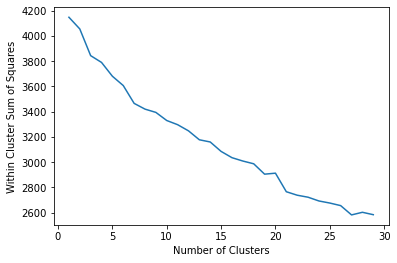

In [42]:
WCSoS = []
for i in range(1,30):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(result)
    WCSoS.append(kmeans.inertia_)
plt.plot(range(1,30), WCSoS)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.show()

## Clustering

In [48]:
!pip install -U spacy

Requirement already up-to-date: spacy in /home/mohamedamine/anaconda3/lib/python3.7/site-packages (2.3.5)


In [51]:
!pip install spacy[lookups]

     |████████████████████████████████| 93.8 MB 42 kB/s  eta 0:00:01     |██████▉                         | 20.0 MB 942 kB/s eta 0:01:19     |██████████████████              | 52.6 MB 773 kB/s eta 0:00:54     |█████████████████████████▍      | 74.5 MB 753 kB/s eta 0:00:26
  Created wheel for spacy-lookups-data: filename=spacy_lookups_data-0.3.2-py2.py3-none-any.whl size=93807572 sha256=ea3ed307ded7fd7ad7d1884e5ccacc894f00727ba7f9a7fa3be6e43b0d02a273
  Stored in directory: /home/mohamedamine/.cache/pip/wheels/53/c2/ca/b2496a732bb10cc3d4adea066bb3f9f427fb22a4df7aebbd76
Successfully built spacy-lookups-data


In [174]:
nlp = spacy.load("en_core_web_sm")

In [44]:
nlp = en_core_web_sm.load() 
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation) #already taken care of with the cleaning function.
stop.update(punctuation)
w_tokenizer = WhitespaceTokenizer()

def get(text):
    final_text = []
    for i in w_tokenizer.tokenize(text):
        if i.lower() not in stop:
            word = lemmatizer.lemmatize(i)
            final_text.append(word.lower())
    return " ".join(final_text)

tweety.tweet = tweety.tweet.apply(furnished)

In [176]:
tweety.head()

,Date,tweet
0,tweet 1:Time:Tue Dec 15 13:41:57 +0000 2020,tweet text:when say peace and..\njoe biden wan...
1,tweet 2:Time:Tue Dec 15 13:42:27 +0000 2020,tweet text: elespanolcom: s\u00e1nchez acepta ...
2,tweet 3:Time:Tue Dec 15 13:42:44 +0000 2020,tweet text:iba decir 'para que luego digan que...
3,tweet 4:Time:Tue Dec 15 13:43:13 +0000 2020,tweet text:\u0427\u0442\u043e \u043f\u0440\u04...
4,tweet 5:Time:Tue Dec 15 13:43:25 +0000 2020,tweet text: yougov: confidence welsh governmen...


In [177]:
technology_words='''
tech
technicology
technological
IT
high-tech
technophile
low-tech
astronautics
technologist
robotics
techie
tech.
electronics
cyberphobia
infotech
digital
technologically
technophobe
avionics
telecommunication
ICT
antitechnology
rocketry
cyberpunk
animatronics
technetronic
high technology
high tech
technoid
CTC
computerese
at
techno-
nucleonics
VoIP
sunset
hydraulics
stem
institute
telephony
nanotechnology
futuristic
technol.
art
technol
the green revolution
BMT
advanced
technism
technomania
Master of Science
technopreneur
killer app
ballistics
stealth
telecommunications
ultrasonics
Bachelor of Science
telemetry
communication
tech-savvy
digerati
information technology
telematics
aerospace
electrotechnology
modern
telepresence
appropriate technology
computer graphics
edtech
sophisticated
sci-tech
M.S.
Voice over Internet Protocol
CDT
chemical engineering
leading edge
telehealth
seat-of-the-pants
metallurgy
computery
agrotechnology
intermediate technology
4G
CMOS
low tech
technic
early adopter
technical college
cyberbabe
technically
futurology
solid-state
digital native
bioengineering
PET scanner
third-generation
ground control
CTO
primitive
sunrise
TMT
platform
techno
imagineer
deskill
gadgetry
Silicon Valley
DSL
cybernetics
orphan
late adopter
wearable
low technology
technostress
augmented reality
maglev
contactless
upgrade
m-
geeky
postindustrial
technophobia
Luddite
radio
3G
up-to-date
technocomplex
modernize
technoculture
the digerati
lead
Silicon Alley
megatechnics
climate engineering
biotechnology
OTA
MTech
cleantech
bit
fluidics
tec
virtual
BTEC
magnetic resonance imaging
technocrat
steampunk
MRI
plasmid
structural unemployment
revolution
manufacturing technology
date
Silicon Glen
Science Museum
terotechnology
enabled
Cyberian
future-proof
bleeding edge
science park
digitally remaster
second-generation
Silicon Fen
technonomy
radiotechnology
giga-
digital immigrant
microelectronics
re-engineer
backwards
techno-mechanic
technician
extropy
wireless
photonics
Bluetooth
geofencing
progress
telemedicine
cloak
BSET
m-commerce
update
space-age
digitally
hi tech
technologize
expo
web development
TVEI
artificial intelligence
RFID
cyberwar
technocracy
predigital
transhumanism
electronica
techno-managerial
informatization
Strategic Defense Initiative
forensic
cultural anthropology
NIST
hearables
televisionary
the Amish
Cambridge
SDI
glitch
microtechnology
subscriber identity module
sonics
MP3
cybernaut
state of the art
technocentric
educational technology
tech-head
futurism
engineering
environmental engineering
information age
Queen's Award
geofence
technomaniac
thermionics
geotechnology
electrogasdynamics
cheminformatics
gearhead
cryology
UNCSTD
low–tech
propeller–head
electronically
groundbreaking
exposition
cyberart
westernized
techno-fetishism
techno-head
HFT
all-digital
intranet
appropriate technologist
fly-by-wire
cybernetically
mega-
miniaturization
oceanology
pyrotechnics
recombinant
fishery
compile
near-field
floptical
techno–thriller
tribology
technics
techno-savvy
TTL
space programme
cybertheft
infancy
videoconference
wearables
archaeometry
gadget
technology-driven
smart room
zootechnical
traceable
super-technological
tricknology
satellite
robotology
space age
cytotechnology
e-lancing
identification technology
innovation
ADSL
reproductive technology
GLT
cutting-edge
haptics
impotent
space technology
cyber-terrorist
tech-heavy
videography
cyberterrorism
future shock
chamber man
technify
technology park
geek
first mover
fantasy
electricity
geolocation
backward
technicize
techMARK
niche technology
surveillance society
Li-Fi
Léger
Stone Age
information officer
generation
outmoded
big beast
DAB
e-ink
cybersphere
cyber
electro-process
e-voting
technology therapy
fluorescence microscopy
archive
new economy
incubator
information economics
mashup
powder metallurgy
Swindon
research park
belly
cryogenics
microblade
microbrowser
trailblazer
move
out-of-date
adopter
media convergence
advance
disruptive
instrument
nearable
engineering science
dual-use
tablet computing
magneto-optical
liberal arts
disruptive technology
first-generation
biophotonics
Nasdaq™
radionic
technologism
robotize
nuclearism
missilery
audiophile
automation
computerist
gap
wizardry
sunrise industry
photography
pioneer
video
techno-shamanism
teledildonics
prospection
technofreak
technified
technification
undeveloped
commercial farming
m-banking
optical disc
Multimedia Super Corridor
alpha geek
access control
state-of-the-art
electron microscopy
nondigital
food technologist
breakthrough
bang
technomite
technology-based
text-to-speech
video technology
fintech
sonic scarecrow
horology
innovator
teachnology
computerphobe
i-mode
civilization
crystallizer
industry standard
electrotechnician
ecotechnology
march
navigation
photovoltaics
squirrel
sink
source
impact
toaster
interactive learning
nerd
smart
geek chic
TTS
technologico-Benthamite
technology assessment
technopark
solutionism
silicon
space industry
save
westernize
aviation
fifth-generation
CDMA
electronic paper
Stealth bomber
knowledge economy
machine age
viewdata
applied linguistics
search
communication engineering
digital economy
computer conferencing
next-generation
technicity
conference
smart grid
TFT
Route 128
near field communication
neotechnic
printing
v-chip
motion capture
hovertrain
astroengineering
colour box
cyber-thriller
convergence
era
pyrometallurgy
techno-hippie
whizzy
backstop
tech-life balance
ecosystem
citizen journalism
arms race
morph
ethnology
live
newbie
communications director
DRM
teleport
venture creation
ceramics
digital nomad
eco-bling
bioprinting
baby-making
grey surfer
liberal studies
green technology
touchless
technopolis
techno-manager
natural
microfabrication
outreach
go-go
information society
mobile
superstation
biotechnics
computer phobia
haptic
predictive
human factors engineering
fixate
General Packet Radio Service
smart antenna
technicized
embrace
B.S.
EGD
technology-heavy
cybersex
cyberfeminism
eye tracking
growth hacking
globalization
high-frequency trading
end user
IT agency
filgrastim
engineer
rare earth
truth table
magnet school
Winchester
gene-splicing
blended learning
pull
QWERTY phenomenon
remaster
first-mover advantage
mature
fanboy
video conference
digital divide
period
uberize
nature
the internet of things
ahead
makerspace
2G
bioimaging
heading machine
City Technology College
HD-ready
cyberwarfare
Generation Y
GPRS
hackerspace
cloud computing
WAP
technology transfer
flash
fangirl
biomechatronics
high-frequency trader
Bauhaus
YAG
fuse
monotechnic
back-to-nature
audiographics
AI
Marinetti, Filippo Tommaso
encode
uncivilized
push technology
feed-in
zap
smart gun
techno-shaman
book-to-bill ratio
object-oriented
E-FIT
mobile technology
safety engineering
sampladelic
SSL
Amish
adoption curve
cybergeek
zootechny
the British Council
face-to-face
bioinformatics
protoculture
push
information explosion
LCoS
human-centered
preˈdictive
retortable
techno-nationalism
techno-nerd
ticket
surface winding
economic interpretation of history
psychotechnology
biopower
relational
Renault, Louis
eco-engineering
capacitive sensing
low-resolution
industry-leading
Marcuse
post-Fordism
rapid prototyping
workforce
instantaneous
perceptual computing
technography
organic light-emitting diode
CAT scan
underdeveloped
infostructure
technoscience
ultra wideband
anachronistic
Plain People
fillet
lidar
the Dow Jones Industrial Average
cultural materialism
flexecutive
Exclusive Brethren
human growth hormone
last mile
technographer
accelerometer
alternative technology
biocatalysis
virtual reality
gyroscope
social media
kilo-
fellow
instructions
inventor
encroachment
function creep
information warfare
Léger, Fernand
lifelong learning
National Enterprise Board
last-mover advantage
third wave
radiotelegraphy
silent commerce
lynchpin
abstruse
analog
alternative birth
engineering geology
revival
broadsword
minicomputer
microcomputer
transistorize
streaming
communication theory
user
gamma interferon
dual-band
lutetium
Samuelson, Paul Anthony
PET scan
Drexel, Anthony Joseph
anaphora
letter-quality
RSS
smokestack industry
navigate
semiconductor
patent
resist
resurgent
physiology
cryonics
imitation
gallium
mainframe
cash cow
quantum leap
transfer
malfunction
emergent
envelop
backspace
appropriation
developed
dystopia
National Curriculum
mute
prophet
automotive
severity
laser
refurbish
bellwether
California
escape key
grapple
edge
envelope
'''

In [178]:
death_words='''
mortal
deadly
deathly
posthumous
fatal
demise
dying
end
fatality
mortality
decease
doom
dead
deathful
lethal
passing
moribund
hereafter
capital
grave
deathward
postmortem
macabre
expiry
eternity
hanging
dissolution
immortal
rest
quietus
life
loss
afterlife
bane
terminal
execution
leave
mortuary
kill
expiration
killing
SIDS
fate
Thanatos
necro-
in extremis
martyrdom
deathbed
sleep
capital punishment
agony
execute
departure
obit
lethe
necrology
die
death knell
curtain
tragic
d
parting
crib death
knell
rigor mortis
necrosis
morbid
dispatch
resurrection
jeopardy
lose
exit
mort
crucifixion
ending
depart
suffer
fateful
nothingness
survive
mortally
decay
malignant
fatally
death wish
asleep
camas
death warrant
monody
deathless
euthanasia
sudden infant death syndrome
electric chair
killer
stark
translate
executioner
martyr
post-mortem
passage
deathblow
ghoulish
bereavement
sword
respite
bitter end
necrophobia
cot death
posthumously
bereaved
anabiosis
paradise
defunction
resuscitate
rattle
last
death's-head
do
other world
utterance
famish
Kali
passion
futurity
future life
deathling
mortification
death angel
thanatology
inquest
halter
grief
death sentence
tomb
revenant
finished
autopsy
bereave
death dance
deathy
passing bell
dormition
black plague
gangrene
quick death
stone
death cup
antemortem
death's wound
transmigrate
the death penalty
death-struck
fail
perishable
beyond the grave
heart failure
death cord
casualty
testate
viaticum
mortific
fey
mourn
death bell
nether
suicide
mortiferous
rope
benign
done
thanatopsis
qualm
reaper
fall
thanat-
thanatoid
night
pod
earthworm
necrobiosis
doomsday
imperishable
life-threatening
winterkill
headsman
predecease
skull
memento mori
obituary
remains
electrocute
savingly
drop
mourning
untimely
necrophilia
charnel
dangerous
agonal
rise
crucify
death by misadventure
stake
bequeath
lament
post-obit
terminally
danger
Elysium
take
doomed
gasp
heaven
non-lethal
future
brain-dead
bardo
perish
samsara
hell
open verdict
deicide
an early grave
great divide
ill-fated
blood
swing
under
done for
behind
afterworld
cadaverous
cheat
deathworthy
omega
sudden death
pestilent
beyond
raise
have one foot in the grave
sepulchral
extremity
danse macabre
ghastly
deathlike
reversion
ordinary
preterminal
death rope
death duty
ante-mortem
megadeath
death row
accident
gibbet
lethality
sink
dead thraw
mortality rate
mystery grass
winter
overlie
plague
Low
lead poisoning
cross
grisly
ghoul
poisonous
bloodshed
life peer
do for
Spirit
life-and-death
skin
feticide
poison sego
big chill
poison cup
death certificate
bereft
last rites
eschatology
will
foul play
reincarnation
strangle
hang
regret
hangman
d.
damned
orphan
deathtrap
time
widower
death mask
coup de grâce
inheritance
change
big sleep
premortal
ruttle
death-wound
deathfulness
death penny
more dead than alive
nigromancy
date
resurrect
decimate
reprieve
baneful
asphyxiate
grieve
mourner
ascension
banshee
postexist
death's gate
NDE
take/claim someone's life
chill
wagang
release
death-dealing
braindead
life instinct
carnage
feral
deith
blood on one's hands
deadly amanita
escape with one's life
immortality
Pale Horse
alamort
going
wild onion
a watery grave
wrongful
on someone's deathbed
thanatomania
to glory
the next life
claim someone's life
poison camas
death-obsessed
death-rattle
undeadly
shed blood
possum
loss of life
curse
Small-Back
brain–dead
lethally
Mors
shed
death-knell
unto
pernicious
liquidate
send to the gallows
from the dead
apoptosis
die in bed
early grave
death-ray
nemesis
stiff
through
fated
hour
gone
deid
have blood on one's hands
feet first
curtains
destroy
lethiferous
pseudocide
scourge
polyptoton
a natural death
cell lethal
atonement
bowstringed
mortify
precipitate
perimortem
carry off
scrag
agonizant
taking-off
death worm
death wound
à outrance
lay
finish
supreme
on one's last legs
cell lethality
necromancy
neurodegeneration
inherit
orphancy
unripe
post-mortuary
critical
charnel house
cheat death/fate
amort
banzai
incorruptible
perishing
nether world
lives
effect
lay someone out
death-squad
obstruction
bloat
asphyxiation
euthanize
eternal life
do or die
(to) within an inch of one's life
lapidation
funest
life's end
inheritance tax
have (sb's) blood on your hands
door
death-defying
bury
self–preservation
post–obit
save someone's (or one's own) life
orphandom
orphanship
death roll
taking off
do away
fine
braxy
cytocidal
mara
IUD
myonecrosis
losing
lost
mortal combat
life–and–death
death-stricken
exitus
after-death
certificate
be the death of
put down
reviviscence
excarnation
gunpoint
mortis causa
be history
soul bell
capital murder
passion play
burn
death trance
quell
tax
autophagy
undying
await
even
unhouseled
death-dance
jaw
unreprievable
of
pest
incommutable
shoot
immature
necropsy
extinguish
darkness
mournful
watery grave
Gehenna
pre–need
respect
damnation
drown
dog's death
needle
deathsman
otherworld
death blast
sentence
electrocution
risk
slayer
reincarnate
pestilence
oblate
frost necrosis
common disaster
damn
infant mortality
linger
memory
testator
a price on someone's head
vigesimation
accident insurance
apotheosis
burnt
death blow
satisfaction
tickle
toll
resting place
pay with one's life
deathday
hereditary
give/sacrifice one's life
kamikaze
mask
pass
sparing
yahrzeit
karoshi
translation
hog potato
misadventure
for dear (or one's) life
tailor
sub specie mortis
peril
suicidal
capital crime
blast
bleed
Avalon
dead bird
burning
churchyard cough
critically
cirrhosis
sign one's own death warrant
death trap
bloodguilt
death-bell
death-throe
death throe
widowed
the hereafter
revivify
oblivion
siblicide
insure
condole
bliss
capital offence
condemn
death feigning
death fire
claim
Panamint Mountains
last day
life after death
sleeping sickness
perseverance
Tophet
kahuna anaana
stroke
starvation
deathliness
life-save
suttee
pancreatic mass
accidental death
regicide
arid
death's door
dance of death
top necrosis
skeleton dance
natural death
SADS
gift causa mortis
Ptolemaic
morphallaxis
soul
lynch law
rest in peace
downswing
cell–lethal
bequest
chloroform
cholera
come to terms with sth
firing squad
be curtains for
sarin
gladiator
judicial killing
inevitable
mind
gallows bird
overtake
pallor
medical examiner
on your last legs
dyingly
empale
empalement
landfall
transmigration
asphyxia
ash
anaconda
redemption
commute
trophy bearer
come to (or meet) a sticky end
damping
death bird
death-in-life
blood money
psychopannychy
biolysis
attrition
auto-da-fe
certainty
cavity
the Grim Reaper
toxic
the Passion
tragedy
unentailed
wrongful death
death-fire
sticky end
lifespan
mind-day
stepmother
judicial murder
weep
vermifuge
testatrix
proscribe
wraith
stepfather
Somnus
genius
insurable
à la mort
bloodshedding
auto-da-fé
attaint
beyond the veil
felony
dangerously
affront
gallows humour
cataplexy
dark tourism
death baby
death metal
death moth
die-off
estate
cheka
Hanover
disinherit
be reincarnated
fade
somatic
happy hunting ground
Four Horsemen
gallows humor
Ganelon
culpable homicide
judge
crossbones
knout
Devi
devolution
fire and brimstone
fatal accident inquiry
Lynch
matter
Hades
Python
morbidity
redeem
non-fatal
swan song
put one's affairs in order
Odin
rope dance
'''

In [179]:
war_words='''
belligerent
warlike
martial
pillage
armament
peace
peaceful
pow
loot
hostility
civil war
antebellum
neutral
peacetime
jihad
man-of-war
warfare
warmonger
mobilize
ARM
combat
military
booty
doughboy
captive
warring
wartime
wage
victory
fighting
sword
conflict
belligerency
Dixie
prison camp
combatant
postwar
levy
interwar
federal
belligerence
fight
militant
pacifism
pre-war
enginery
neutrality
Great War
action
foe
antiwar
waddy
war-torn
veteran
mars
crusade
manubial
panzer
demobilize
hot war
union
casus belli
prize
campaign
Ares
plunder
bushwhacker
cobelligerent
confederate
cannon fodder
digger
preparedness
nonwar
warless
pacifist
bellicose
strategic
foeman
war hawk
prisoner
prewar
Cavalier
trophy
pacify
biological warfare
spoliation
w
polemy
armory
maquis
stalag
contraband
siphonophore
prize court
exploit
shell shock
conflagration
World War I
warhorse
warship
World War II
drug fight
CAR
armada
postbellum
scythe
skirmish
poilu
munition
nom de guerre
dove
ally
allied
anti-war
French and Indian War
after-war
cutter
d-day
unionist
arms
unionism
escadrille
auxiliary
hostile
werre
prisoner of war
buffer state
Troy
destrier
axis
buckskin
reconstruction
Whig
front
physalia
demolition
harry
loyalist
PW
at peace
bellipotent
bloodshed
compound
cease-fire
havoc
mastery
armistice
declare war on
slogan
air power
host
bluebottle
redcoat
dextrer
bellona
Spanish Civil War
martialism
guerrilla
caravel
carnage
spoil
conquer
polemology
world war
war-game
the home front
victor
hawk
peacemaker
grunt
royalist
harness
defeat
neutralize
Tiu
intern
artillery
copperhead
casualty
capability
holocaust
palfrey
brake
fallen
peacenik
Unknown Soldier
Garand rifle
M-1
cold war
pyrrhic
fleet admiral
blitzkrieg
struggle
B-17
man
metal
aggressor
general of the army
V-1
Odin
War of 1812
strategy
haka
holy war
Roundhead
ANZAC
galley
standing army
Ashur
service
enemy
Mexican War
lewisite
Tyr
Central Powers
germ warfare
spitfire
reprisal
logomachy
safe-conduct
target
Old South
side
battle fatigue
militarize
embed
Stark
gallantry
courser
Yankee
petrary
gigantomachy
engine
war–game
cold warrior
Diomedes
post-war
shooting war
hooker
double-decker
vanquish
observation kite
battle cry
pendragon
Gulf War
go to war
three-decker
Axis Powers
spoils
ram
mall
warred
trouble spot
the front line
home front
onager
victorious
WW
rallying cry
war-ravaged
war zone
steed
Shiloh
army
Durga
jingo
duck
bomber
smite
SDS
war crime
reparation
break
break out
Memnon
war bride
blue
Liberty ship
torment
graith
win
navy
gray
U-boat
butternut
prosecution
fall
theatre
militarist
flail
baby boomer
American Revolution
de-escalate
peninsular
Ajax
war risk insurance
prosecute
battle
the First World War
declare
defensive
warproof
discord
put to the sword
Iran–Iraq War
retire
pacifistic
WRO
WRI
the Great War
EPW
Big Stoush
hessian
internee
fatigue
chariot
such
on the warpath
innocent
wardroom
B-29
Butler
Sarpedon
aw
cyberwar
IPW
greenback
Myrmidon
scallywag
Wehrmacht
refugee
rebel yell
Gauleiter
rostrum
cartel
revolutionary
counterattack
supply line
the Second World War
engagement
slave state
War Between the States
V-E Day
the Red Cross
truce
brig
first-rate
war game
sloop
carpetbagger
chemical warfare
fire-eater
cockpit
Spanish-American War
sea bladder
warhable
malleus
capture
death-roll
bearing arrow
mere
emergency
slaughter
land girl
decimation
Yankee Doodle
Clinton
Jayhawker
severity
camp
sack
Paris
Portuguese man–of–war fish
battle dance
Vietnam
Six Day War
belle époque
rise
baby boom
charger
croisado
make
magazine
unmunitioned
war criminal
war sack
warpaint
fitna
in the field
warbonnet
warmongering
world-war
at war
remilitarize
the fortunes of war
between
in battle
Russo-Finnish War
martiality
AMVETS
drake
soup kitchen
cruiser
clarion
the Fatherland
bellicist
noncombatant
clarigate
mangonel
WWII
pro-war
debellate
Tyrr
ramberge
austerity
banzai
taua
war whoop
costly
nautilus
pacificism
prisoner-of-war
reconstructionism
militiate
peace treaty
pacific
June War
loss
bellical
front-line
frigate bird
crack
exercise
infowar
civil
under arms
WWI
vesicatory gas
infernal
warray
tug-of-war
Kaiser Bill's war
between the wars
warworn
trench war
goon
war cloud
war–weary
unwarlike
the Allies
true
big one
six bob a day tourist
contribution
non-combatant
body count
two-decker
wind
sneak
were
freebooter
launch
raider
war footing
four–stacker
war of independence
war effort
exchequer
Croix de Guerre
white Russian
Eichmann
amtrac
preparationist
E-boat
defensible
biological weapon
pease
chase
unreconstructed
war baby
flattened
belligerati
tucker
Assur
free goods
attrition warfare
laocoon
kriegsspiel
sinews of war
perils of war
Hundred Years War
for the duration
crusader
undeclared
none
conning tower
gunnage
thundercloud
friendly
pacifico
catapult
philopolemic
our boys
the fallen
Villiers
menace
social
liner
sea power
tactic
amtrak
zu–zu
boisterous
war potential
battle–ax
safeguard
weaponize
survive
fratricide
Lysander
global security
outward
talk
biowarfare
generalship
bioweapon
atrocity
preventionism
peaceable
outbreak
Putnam
omnicide
status quo ante bellum
fratricidal
retread
war hatchet
Jodl
sitzkrieg
conscientious objector
war song
manofwar
Vietnamization
stramash
pope
mustard gas
gung-ho
mortality
quarter-galley
scrap
ETO
Korean War
fatality
Boche
ensa
pahi
war widow
free-soil
march
miquelet
outgrowth
apocalypse
artiller
spoiler
war room
the fog of war
Reb
valour
force
ravages
Sheridan
grim dig
war belt
bar
battleship
Sutherland, Graham
war power
free ship
khaki election
antedate
Bairnsfather
war clouds are gathering
enkindle
battlefield
Blunden
Somme
Odysseus
battleground
better dead than red (or better red than dead)
war-drum
corvette
Ardennes
Benedict XV
class struggle
cease–fire
undo
Chattanooga
displacement
conscription
Morgan
presumed dead
desert rat
article
Nestor
bonus
blot
classic
Lost Generation
buff
bummer
Lewis gun
chateau-thierry
eventuate
stern walk
the Holocaust
war party
war–tax stamp
depopulate
ironsides
lee
jehad
demilitarize
parliamentarian
posture
American Independence, War of
Idomeneus
declare war
gunrunning
the SS
rakshasa
short-timer
expedition
transit camp
hatchet
Distinguished Service Medal
the Iron Curtain
Enver Pasha
Gollancz, Sir Victor
front-line states
fritz
gas war
send
rupture
Priam
no-fly zone
Upper Silesia
soman
Purple Heart
turkey shoot
trench raid
tankodrome
rum jar
minuteman
Thomas
armed camp
attrition
ante
together
Armistice Day
aggression
temerity
sanguinary
Buchenwald
claim
sponson
change sides
militate
over
Burgoyne
battering ram
call up
Othin
testiere
Red Cross
Guesclin
Francoist
feeding station
Siegfried line
Flanders field
abolitionist
kamerad
limited war
collaborate
nerve gas
Pandarus
pacific blockade
peace symbol
pursuit plane
Cystonectae
containment
death toll
dromon
espringal
haka party
precipitate
absurdity
wordy
allies
bloody chasm
blue coat
Armageddon
alien property custodian
conquest
Jackson
chicken hawk
doodlebug
cenotaph
killing fields
Charles VII
graycoat
Bren gun
stem anchor
stormbird
evacuee
Forrest
zone of interior
Waac
warcraft
during
ecocide
eve
arduous
anchor
barrier
beginning
Lawrence
devastate
grey
greyback
frigate
khaki
mobilization
north
peso
quoit
Free State
snafu
internment
yank
waste
subterfuge
scathing
Owen
red devil
reds under the bed
Timoshenko
Rehab farm
R-boat
royal refugee
Revolutionary War
trireme
Rehabilitation Department
Seven Years' War
Serapis
perish
Ishtar
seraskier
V-J Day
Sherman tank
Dewey
bren
reconstruct
Trojan
concentration camp
cyclic poets
enemy alien
Hood
Horsa
just war
fifth column
Mae West
Helen of Troy
Khe Sanh
Knox
Maori battalion
maneuver
DUKW
friendly fire
Missionary Ridge
Picardy
phoney war
Shimonoseki
poison gas
squadron
re-escalation
Taylor
state of war
Tory
theomachy
knee mortar
notgeld
Big Bertha
service medal
duration
Bletchley Park
dromond
boozer
warfighting
force-feed
peace process
the Security Council
Beatty
Stanton
Second World War
hardware
hell
liaison
mace
powder-division
psychology
strength
stockade
southron
perrier
passport
sweep
nuclear
ration
red-coated
repatriate
scourge
scrip
ship
collateral damage
air warden
Blighty
cold peace
a crime against humanity
alien enemy
air cover
Agent Orange
pygmy
raise
fecial
first war
cage
displaced person
arms race
Ferdinand I
copperheadism
Falangist
hydrozoan
Oder-Neisse Line
offensive
internecine
Front de Libération Nationale
Palo Alto
GI bride
supply
vindicate
base hospital
charlie
blood feast
Armentières
Arnhem
capitulate
combat fatigue
chocolate soldier
choco
all's fair in love and war
co-belligerent
skirmishing
front line
evacuate
crop-eared
battle–tested
Great Rebellion
demonomachy
commando
commodore
lay something waste/lay waste to something
Nissen hut
normalize relations
Davis
peacekeeping
overrun
rebel
Stuart
Suribachi
privateer
public enemy
Quirinus
outgun
battle-scarred
rattle-head
Thucydides
re-escalate
trebuchet
Rhode Island sloop
Sammy
strategist
trench
crinet
rules of engagement
Fokker
lady's hole
methyl rubber
man–of–war
New South
Nomeus
muster
palikar
slavocracy
slay
substitute broker
cataphract
bridge
bounty
blockade
habiliment
hector
aftermath
maelstrom
depict
desolate
nightingale
northerner
overhang
war chest
war debt
war drum
diphosgene
dearth
convoy
last
intertribal
peacemonger
upheaval
utensil
foray
stratagem
yeoman
battledress
armor-plated
warrior
all-out
Bermuda Hundred
doucepere
Australian Imperial Force
Apis
billet
bloodletting
Blue Orchid
'''

In [180]:
economy_words='''
economically
economic
econ.
cheeseparing
economize
around
elliptical
saving
sector
frugal
economist
monetarism
consumerism
thrifty
husband
deflate
austerity
subeconomy
CAFE
thrift
macroeconomics
free enterprise
providence
prudence
frugality
husbandry
overheat
disequilibrium
microeconomics
slump
diseconomy
parsimony
downturn
deflation
depression
countercyclical
banana republic
economical
collectivize
mercantilism
economics
interventionist
supply side
tourist class
eco-
mixed economy
knowledge economy
money supply
downswing
consumer confidence
pump-priming
free economy
inflate
reflate
jump-start
plutonomy
share economy
the private sector
spare
sick
state socialism
industrialism
economic indicator
private sector
agronomy
unemployment
buoyancy
public sector
aggregate
depress
pinch
UK plc
catallactics
market economy
nurse
bullish
bearish
command economy
economies
perestroika
stabilizer
economic model
rural
procyclical
controlled economy
oeconomy
disorder
joblessness
recovery
transitional economy
depressed
marketization
service economy
squander
recession
matron
anatomy
club class
interventionism
housewife
Mill
managed economy
industry
Celtic tiger
buyer's market
free marketeer
developed
buoyant
pastoralize
grow
physiocrat
quantitative easing
supply-side
monetary
tiger economy
coach
dirigisme
macroeconomy
basic industry
slack
third sector
demand side
laissez-faire
bubble economy
elliptic
buoy
crash
overheated
rebound
the three Es
informal economy
econ
parallel economy
tighten
penny-pinching
soft landing
flow
the secondary sector
manager
dismal science
deindustrialization
business class
the tertiary sector
managery
householdry
the shadow economy
the underground economy
information economy
stable
mainstay
index of leading economic indicators
cool
socialism
Panic
thrive
structural
soft
the primary sector
capital stock
growth
post-industrial
green shoots
dispensation
reflation
downsize
ailing
market-oriented
indicator
hard currency
planned economy
boom and bust
growth company
forecast
locomotive
marine
economy-size
supply-side economics
economic system
manufacturing base
capitalism
sound
economy-wide
monetary aggregate
systemic risk
finance
free market
stop-go
capital outflow
flow of funds
underground economy
capital inflow
spiral
rural economist
shock
taut
sectoral
developing
monetary policy
contract
globalization
autonomous investment
subsistence economy
economic sanctions
leading indicator
capital consumption
rent
plutonomic
Wall Street
lean
meanness
agriculturism
malaise
velocity
polytechnization
eke out
economic blizzard
developmental
gas-guzzler
husbandable
strong
coach class
correction
sparing
rescue
Economy 7
strangle
providentness
contractionary
monetary growth
microeconomic
Europeanize
the G8
function
huswifery
economic cycle
reinflate
aggregate demand
pinchpenny
operate
self-indulgent
the Blue Book
boomlet
transition economy
marketless
Goldilocks economy
inefficient
over-investment
hidden economy
dismal
stagnation
over-invest
regime
size
dislocate
driver
prodigality
statism
stagflation
healthy
performance indicator
economic tiger
price deflation
the feel-good factor
professor
turn
ecotourism
housewive
world economy
pump priming
monetary stimulus
high-duty
narco-state
overheating
corporate state
astriction
structural unemployment
economic paradigm
shadow economy
secondary sector
segment
English disease
penny–pinch
goods and services
strength
structural adjustment
statistics
exchange economy
tradable sector
open economy
partial equilibrium
nation
monetary base
save
siege economy
savings ratio
strategic industry
efficient
functional finance
distribution
rich
Martineau
health check
avail
chrematistics
autarky
barter
considerable
wide-body
inflated
infusion
retrenchment
company
performance measurement
nairu
the grey pound
precipitate
destructive
turndown
the money supply
statistical office
chrysology
boom
business sector
black money
staple
bibliography
hinterland
overproduction
the new economy
eke
the third sector
service sector
circulation
tertiary sector
expansionism
economic analysis
economic climate
upthrust
destabilization
electronics
new economy
inflow
recovery period
information economics
infrastructural
high-growth
work
immobilize
payroll
uptrend
dollarization
colonialism
disinvest
unhealthy
fine–tune
equicaloric
economic forecast
economic theory
induced investment
base
demonopolize
growth rate
niche market
technocracy
utility function
tertiary industry
slowdown
underdeveloped
momentum
bicoastal
sticky
index of coincident indicators
national economy
detailed
well-managed
turn down
tax incentive
credit crunch
concierge economy
brain gain
neutral money
hypermiling
Asian tiger
coincident indicator
broad money
kick-start
stagnant
mismanagement
capital accumulation
development
hollow out
consumer sovereignty
leading economic indicator
economic crime
cost control
commercial code
weak
cash-rich
supranational
agroecosystem
FIRE economy
general equilibrium
medicine
strengthen
rev
moribund
reconstruction
health
split die
consumption
intervene
experience economy
economic agent
economic planning
output
false dawn
industrialized
privatize
consumer economy
consumer
cooperative
old economy
the enterprise economy
SIFI
sentiment indicator
ophelimity
retool
revitalize
shambles
commercial sector
tiger
input/output
hyperinflation
feelgood factor
economic deregulation
contraction
stakeholder economy
bellwether
affair
supply-driven
saltwater economics
sentiment
plutology
pump
statistic
viable
benign
the ONS
welfare economics
beast
closed
fielden
demand
dirigiste
essential industry
freshwater economics
hysteresis
Office for National Statistics
systemic
listless
bailout
geopolitics
digital economy
price effect
industrial base
inroad
symptomatic
rigidity
scupper
fugitive
agronomics
agriculture
zaibatsu
variable annuity
diseconomy of scale
recover
syndicalism
compound growth rate
corporate
cyclical commodity
topography
Jevons
economic development
final consumption
fundamental
the New Right
trickle-down
hoover
partial equilibrium analysis
Conservative Party
capital–output ratio
Querétaro
capital deepening
model
Archipenko
stimulus package
heteroplasm
agro-industry
build
tank
trade
central bank
capital
headline
market liberalism
flight capital
axiom
fundamentalist
fundamentals
neocolonialism
human capital
market basket
meltdown
new deal
treasury
rescue package
reabsorb
porporino
augur
stringent
stabilize
kilter
technical
technical indicator
compel
basilical
technostructure
oomph
tinker
scientific management
bleed
stability
average salary
fiscal drag
business cycle
economic war
discomfort index
domestic credit expansion
knowledge society
economic nationalism
external analysis
infrastructure
market forces
Assad, Hafiz al-
canvas
capital control
economic environment
structural surplus
the retail sector
entrench
the Congressional Budget Office
the Council of Economic Advisers
National Socialism
market society
economic growth
stabilization
Keynesian economics
kith
cyclical deficit
enterprise zone
Clearfield
austerity program
Casper
scottish
shakeout
Black Economic Empowerment
cameralism
destabilize
real economy
profit
misery index
political economy
socio-economy
the IMF
structural deficit
the G20
the World Economic Forum
the Rustbelt
buffet
bust
fiscal
unregulated
eclectic
the Roaring Twenties
value-added
stress
average earnings
frictional unemployment
consumerist
dislocation
economic stimulus
Masai
Ifo
general
automatic stabilizer
BEE
industrialization
big
alienation
Dawes, Charles Gates
technical analysis
economizer
capital flight
lynchpin
consensus forecast
Leontief, Wassily
Roscommon
too big to fail
National Enterprise Board
principle of war
market correction
Reaganomics
trickle-up
Martineau, Harriet
invisible
Ob–Ugrian
reactivate
key performance indicator
long-tail
monolithic
consolidation
Chenchu
knowledge industry
green economy
Frisch
Purchasing Managers' index
buffer stock
Economite
federal bank
neglect
capitalist
communism
the Federal Reserve Board
macroeconomic
purposive
narrow money
real wages
scenario planning
middle way
rational expectations
suasion
KPI
price-level targeting
micro
lagging indicator
oversaving
contagion
recovering
the G5
taxpayer
capital widening
fascism
industrial revolution
value added
open market
equilibrium
purchasing power parity
NIESR
San Luis Potosí
state sector
economic institution
Asian flu
loadsamoney
victim
debt ratio
market socialism
anorexic
maladjusted
doldrums
Hamiltonianism
structural fund
smokestack industry
the Dow Jones Average
libertarian
five–year plan
get
evaporate
practise
politics
varied
Saskatchewan
classical economics
turmoil
Lewis with Harris
ecology
stimulate
subdued
transform
Ricardo, David
market mechanism
reserve
mileage
direct control
Mesolithic
Netherlands Antilles
glut
Goering, Hermann Wilhelm
Jeffersonianism
stagnate
the Federal Reserve Bank
kibbutz
Orange Free State
industrial
Vanuatu
prognosis
brevity
Bangladesh
cyber-terrorist
difficulty
reverberate
taste
advancement
city
shackle
tabloid
pummel
import
Kuwait
Nauru
catastrophic
socioeconomic
Koweit
Maldives
litmus test
maelstrom
slogan
insecurity
standard
labor
consume
dreary
Brunei
Iceland
bankrupt
Ukraine
living
Cuba
'''

source: https://reversedictionary.org/

In [181]:
technology = get(technology_words)
death = get(death_words)
war = get(war_words)
economy = get(economy_words)

In [182]:
string1 = technology
words = string1.split()
technology = " ".join(sorted(set(words), key=words.index))
technology

"tech technicology technological high-tech technophile low-tech astronautics technologist robotics techie tech. electronics cyberphobia infotech digital technologically technophobe avionics telecommunication ict antitechnology rocketry cyberpunk animatronics technetronic high technology technoid ctc computerese techno- nucleonics voip sunset hydraulics stem institute telephony nanotechnology futuristic technol. art technol green revolution bmt advanced technism technomania master science technopreneur killer app ballistics stealth ultrasonics bachelor telemetry communication tech-savvy digerati information telematics aerospace electrotechnology modern telepresence appropriate computer graphic edtech sophisticated sci-tech m.s. voice internet protocol cdt chemical engineering leading edge telehealth seat-of-the-pants metallurgy computery agrotechnology intermediate 4g cmos low technic early adopter technical college cyberbabe technically futurology solid-state native bioengineering pet 

In [183]:
string1 = death
words = string1.split()
death = " ".join(sorted(set(words), key=words.index))
death

"mortal deadly deathly posthumous fatal demise dying end fatality mortality decease doom dead deathful lethal passing moribund hereafter capital grave deathward postmortem macabre expiry eternity hanging dissolution immortal rest quietus life loss afterlife bane terminal execution leave mortuary kill expiration killing sids fate thanatos necro- extremis martyrdom deathbed sleep punishment agony execute departure obit lethe necrology die death knell curtain tragic parting crib rigor mortis necrosis morbid dispatch resurrection jeopardy lose exit mort crucifixion ending depart suffer fateful nothingness survive mortally decay malignant fatally wish asleep camas warrant monody deathless euthanasia sudden infant syndrome electric chair killer stark translate executioner martyr post-mortem passage deathblow ghoulish bereavement sword respite bitter necrophobia cot posthumously bereaved anabiosis paradise defunction resuscitate rattle last death's-head world utterance famish kali passion fut

In [184]:
string1 = war
words = string1.split()
war = " ".join(sorted(set(words), key=words.index))
war


"belligerent warlike martial pillage armament peace peaceful pow loot hostility civil war antebellum neutral peacetime jihad man-of-war warfare warmonger mobilize arm combat military booty doughboy captive warring wartime wage victory fighting sword conflict belligerency dixie prison camp combatant postwar levy interwar federal belligerence fight militant pacifism pre-war enginery neutrality great action foe antiwar waddy war-torn veteran mar crusade manubial panzer demobilize hot union casus belli prize campaign ares plunder bushwhacker cobelligerent confederate cannon fodder digger preparedness nonwar warless pacifist bellicose strategic foeman hawk prisoner prewar cavalier trophy pacify biological spoliation w polemy armory maquis stalag contraband siphonophore court exploit shell shock conflagration world warhorse warship ii drug car armada postbellum scythe skirmish poilu munition nom de guerre dove ally allied anti-war french indian after-war cutter d-day unionist unionism escadr

In [185]:
string1 = economy
words = string1.split()
economy = " ".join(sorted(set(words), key=words.index))
economy

"economically economic econ. cheeseparing economize around elliptical saving sector frugal economist monetarism consumerism thrifty husband deflate austerity subeconomy cafe thrift macroeconomics free enterprise providence prudence frugality husbandry overheat disequilibrium microeconomics slump diseconomy parsimony downturn deflation depression countercyclical banana republic economical collectivize mercantilism economics interventionist supply side tourist class eco- mixed economy knowledge money downswing consumer confidence pump-priming inflate reflate jump-start plutonomy share private spare sick state socialism industrialism indicator agronomy unemployment buoyancy public aggregate depress pinch uk plc catallactics market nurse bullish bearish command perestroika stabilizer model rural procyclical controlled oeconomy disorder joblessness recovery transitional depressed marketization service squander recession matron anatomy club interventionism housewife mill managed industry cel

In [186]:
def jaccard_similarity(query, document):
    intersection = set(query).intersection(set(document))
    union = set(query).union(set(document))
    return len(intersection)/len(union)

def get_scores(group,tweets):
    scores = []
    for tweet in tweets:
        s = jaccard_similarity(group, tweet)
        scores.append(s)
    return scores

tech_scores = get_scores(technology, tweety.tweet.to_list())
death_scores = get_scores(death, tweety.tweet.to_list())
war_scores = get_scores(war, tweety.tweet.to_list())
eco_scores = get_scores(economy, tweety.tweet.to_list())

In [187]:
# create a jaccard scored df.
data  = {'names':tweety.Date.to_list(),       
         'technology_score':tech_scores,
         'death_score': death_scores, 
         'war_score':war_scores, 
         'economy_scores':eco_scores}

scores_df = pd.DataFrame(data)#assign classes based on highest score

def get_classes(l1, l2, l3, l4):
    techny = []
    deathy = []
    wary = []
    econy = []
    for i, j, k, l in zip(l1, l2, l3, l4):
        m = max(i, j, k, l)
        if m == i:
            techny.append(1)
        else:
            techny.append(0)
        if m == j:
            deathy.append(1)
        else:
            deathy.append(0)        
        if m == k:
            wary.append(1)
        else:
            wary.append(0)  
        if m == l:
            econy.append(1)
        else:
            econy.append(0)   
            
    return techny, deathy, wary, econy

l1 = scores_df.technology_score.to_list()
l2 = scores_df.death_score.to_list()
l3 = scores_df.war_score.to_list()
l4 = scores_df.economy_scores.to_list()

techny, deathy, wary, econy = get_classes(l1, l2, l3, l4)

data = {'name': scores_df.names.to_list(), 'technology':techny, 'death':deathy, 'war':wary, 'economy': econy}
class_df = pd.DataFrame(data)
#grouping the tweets by username
new_groups_df = class_df.groupby(['name']).sum()#add a new totals column
new_groups_df['total'] = new_groups_df['technology'] + new_groups_df['death'] + new_groups_df['war'] +  new_groups_df['economy']#add a new totals row
new_groups_df.loc["Total"] = new_groups_df.sum() 

In [188]:
new_groups_df.head()

,technology,death,war,economy,total
name,,,,,
tweet 10:Time:Tue Dec 15 13:43:47 +0000 2020,0,0,0,1,1
tweet 11:Time:Tue Dec 15 13:44:09 +0000 2020,0,1,0,0,1
tweet 12:Time:Tue Dec 15 13:44:12 +0000 2020,0,0,0,1,1
tweet 13:Time:Tue Dec 15 13:44:12 +0000 2020,0,0,0,1,1
tweet 14:Time:Tue Dec 15 13:44:15 +0000 2020,0,0,0,1,1


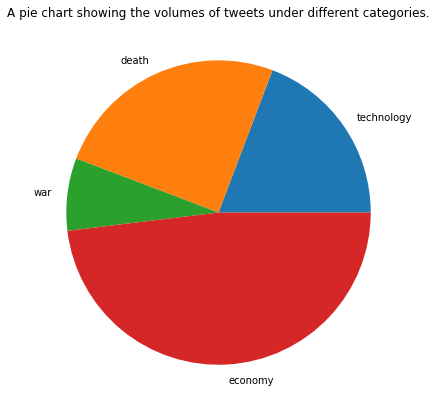

In [189]:
fig = plt.figure(figsize =(10, 7)) 
a = new_groups_df.drop(['total'], axis = 1)
plt.pie(a.loc['Total'], labels = a.columns)
plt.title('A pie chart showing the volumes of tweets under different categories.')
plt.show()

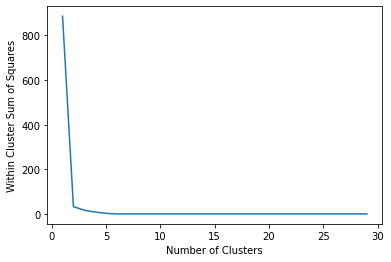

In [195]:
data = new_groups_df[['economy', 'technology','death','war']].values

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    WCSoS = []
    for i in range(1,30):
        kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
        kmeans.fit(data)
        WCSoS.append(kmeans.inertia_)

    plt.plot(range(1,30), WCSoS)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Within Cluster Sum of Squares')
    plt.show()

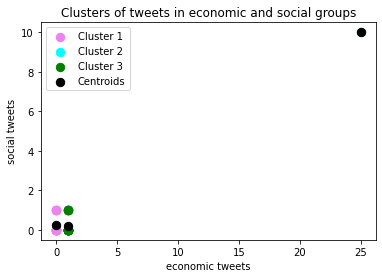

In [196]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(data)# Visualising the clusters
plt.scatter(data[Y_kmeans==0, 0], data[Y_kmeans==0, 1], s=70, c='violet', label= 'Cluster 1')
plt.scatter(data[Y_kmeans==1, 0], data[Y_kmeans==1, 1], s=70, c='cyan', label= 'Cluster 2')
plt.scatter(data[Y_kmeans==2, 0], data[Y_kmeans==2, 1], s=70, c='green', label= 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=70, c='black', label='Centroids' )
plt.title('Clusters of tweets in economic and social groups')
plt.xlabel('economic tweets')
plt.ylabel('social tweets')
plt.legend()
plt.show()

In [202]:
!pip install watermark

  Using cached watermark-2.1.0-py2.py3-none-any.whl (5.7 kB)


In [218]:
%watermark --iversions

numpy         : 1.18.5
matplotlib    : 3.2.2
re            : 2.2.1
nltk          : 3.5
spacy         : 2.3.5
json          : 2.0.9
sys           : 3.7.7 (default, May  7 2020, 21:25:33) 
[GCC 7.3.0]
DateTime      : 4.3
csv           : 1.0
en_core_web_sm: 2.3.1
pandas        : 1.0.5



In [35]:
pip list

Package                            Version
---------------------------------- -------------------
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 1.10.0
anaconda-project                   0.8.3
argh                               0.26.2
asn1crypto                         1.3.0
astroid                            2.4.2
astropy                            4.0.1.post1
atomicwrites                       1.4.0
attrs                              19.3.0
autopep8                           1.5.3
Babel                              2.8.0
backcall                           0.2.0
backports.functools-lru-cache      1.6.1
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.0.post1
beautifulsoup4                     4.9.1
bitarray                           1.4.0
bkcharts                           0.2
bleach                             3.1.5
blis                           